# Plotting Heartbeat Distubance

This script should extract the data from the IDMLogger_ascension.csv in the ./heartbeat folder

data is x,y,z,a,e,r
2 sets, first data point is the one on the catheter, 
2nd is the one on the beating heart stage

sampling rate(200Hz)

Jake Sganga
12/1/2015

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

sns.set_style("dark")
sns.set_context("talk")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


importing the pickled data from save_heartbeat.py

In [3]:
with open( "heartbeat.p", "rb" ) as input_file:
    heart = pickle.load(input_file)

In [4]:
heart_cath = heart[0]
heart_stage = heart[1]
delta_heart = heart[2]
print(heart_cath[0])
print(type(heart_cath))

[ 1.09757275  0.23953788 -0.09939144  3.42166716  0.36683554  2.93084317]
<class 'numpy.ndarray'>


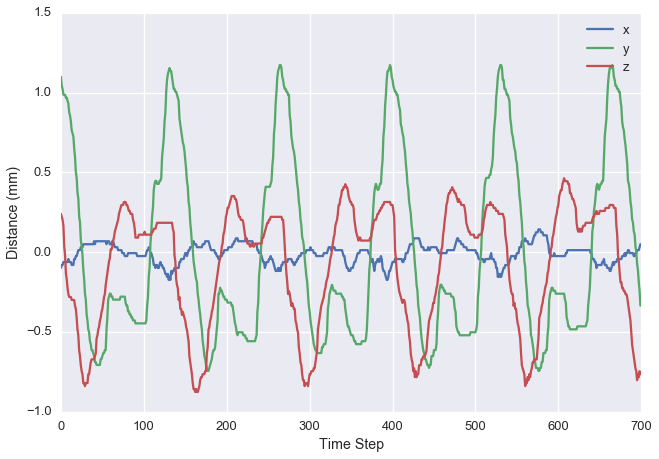

In [17]:
offset = 0
total = 700
plt.plot(heart_cath[:total,2], '-')
plt.plot(heart_cath[:total,0], '-')
plt.plot(heart_cath[offset:total,1], '-')
plt.legend(['x', 'y', 'z'])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Distance (mm)')

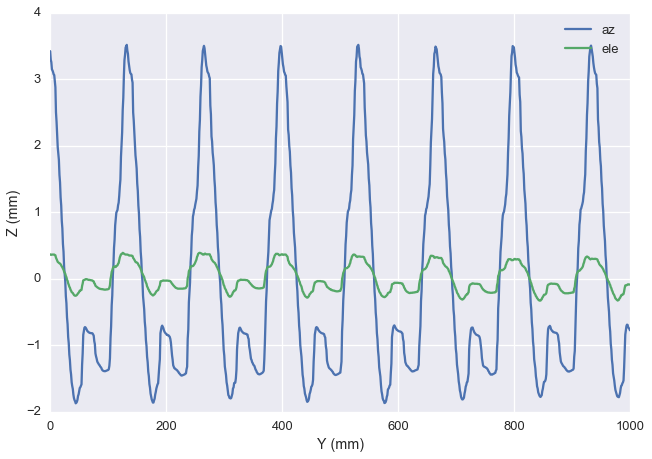

In [19]:
plt.plot(heart_cath[:1000,3], '-')
plt.plot(heart_cath[:1000,4], '-')
plt.legend(['az', 'ele'])
plt.grid(True)


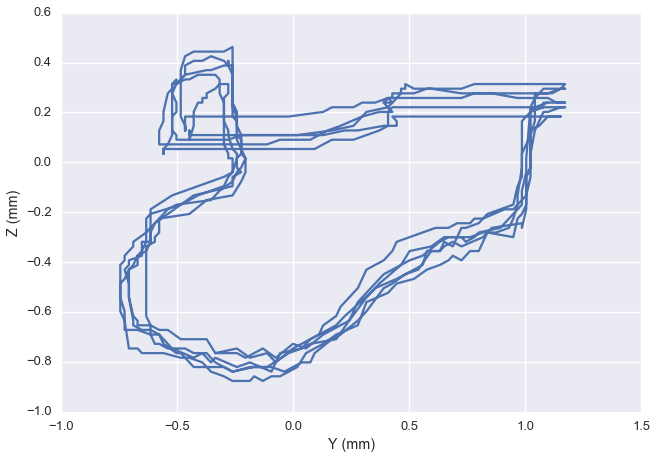

In [21]:
plt.plot(heart_cath[:total,0], heart_cath[:total,1], '-')
plt.grid(True)
plt.xlabel('Y (mm)')
plt.ylabel('Z (mm)')

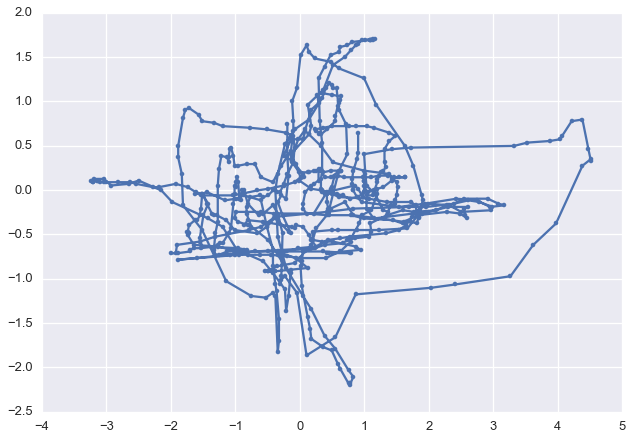

In [8]:
plt.plot(heart_stage[:600,0], heart_stage[100:700,1], '.-')
plt.grid(True)

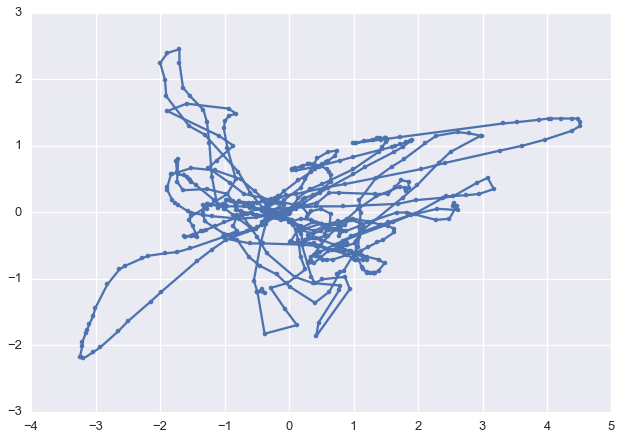

In [9]:
plt.plot(heart_stage[:600,0], heart_stage[:600,1], '.-')
plt.grid(True)

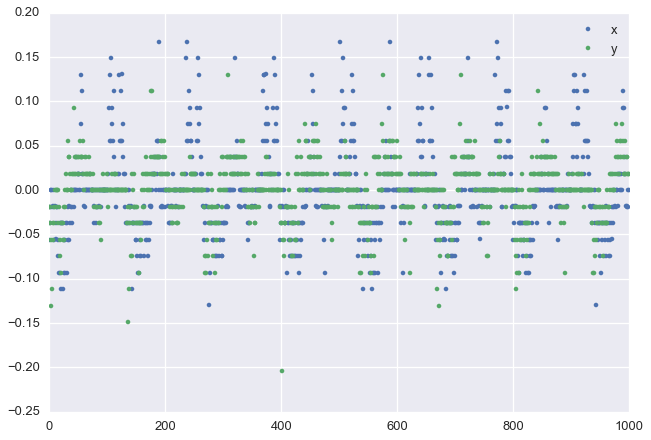

In [10]:
plt.plot(delta_heart[:1000,0], '.')
plt.plot(delta_heart[100:1100,1], '.')
# plt.plot(heart_cath[:1000,2], '-')
plt.legend(['x', 'y', 'z'])
plt.grid(True)
# plt.xlabel('Time(s)')
# plt.ylabel('Position in global X axis (mm)')

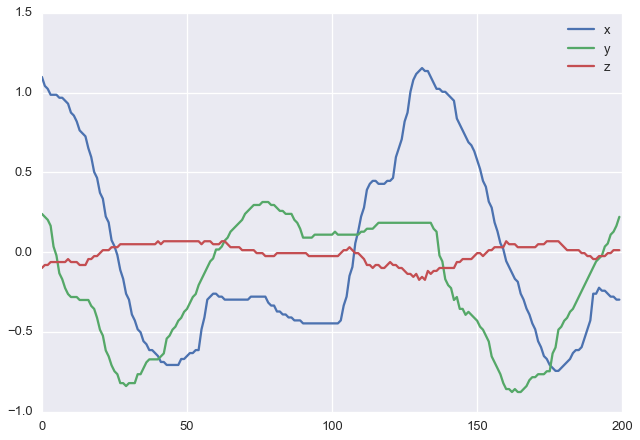

In [11]:
plt.plot(heart_cath[:200,0], '-')
plt.plot(heart_cath[:200,1], '-')
plt.plot(heart_cath[:200,2], '-')
plt.legend(['x', 'y', 'z'])
plt.grid(True)
# plt.xlabel('Time(s)')
# plt.ylabel('Position in global X axis (mm)')

[[   1    0    0    0    0]
 [   1    1    1    1    1]
 [   1    2    4    8   16]
 [   1    3    9   27   81]
 [   1    4   16   64  256]
 [   1    5   25  125  625]
 [   1    6   36  216 1296]
 [   1    7   49  343 2401]
 [   1    8   64  512 4096]
 [   1    9   81  729 6561]] [[ 1.        ]
 [ 0.99802673]
 [ 0.9921147 ]
 [ 0.98228725]
 [ 0.96858316]
 [ 0.95105652]
 [ 0.92977649]
 [ 0.90482705]
 [ 0.87630668]
 [ 0.84432793]]
(5, 5)
(5, 1)
(100, 5) (100, 1)
(5, 1)
[ 0.0338351]
0.183943186481
here 0.0
w [ 1.09757275  1.04173942  1.02307275  0.98590609  0.98590609  0.98590609
  0.96723942  0.96723942  0.94873942  0.93007275  0.87423942  0.85573942
  0.81840609  0.76273942  0.74407275  0.72540609  0.65107275  0.59523942
  0.50223942  0.46507275  0.37190609  0.33473942  0.22307275  0.18590609
  0.07440609  0.03707275 -0.01876058 -0.11176058 -0.16759391 -0.26059391
 -0.29776058 -0.39076058 -0.42792725 -0.48376058 -0.50242725 -0.55826058
 -0.57676058 -0.61392725 -0.61392725 -0.63259391 -0.

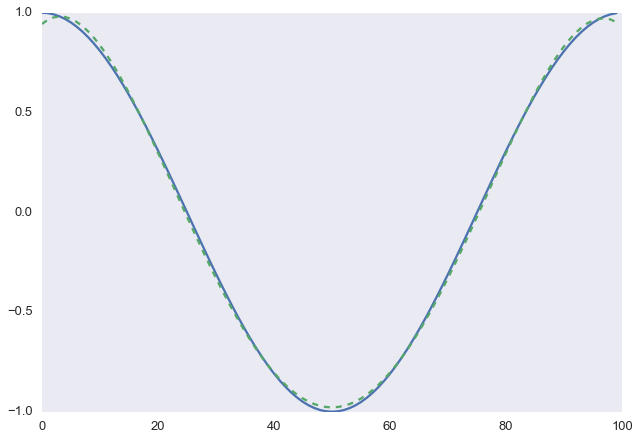

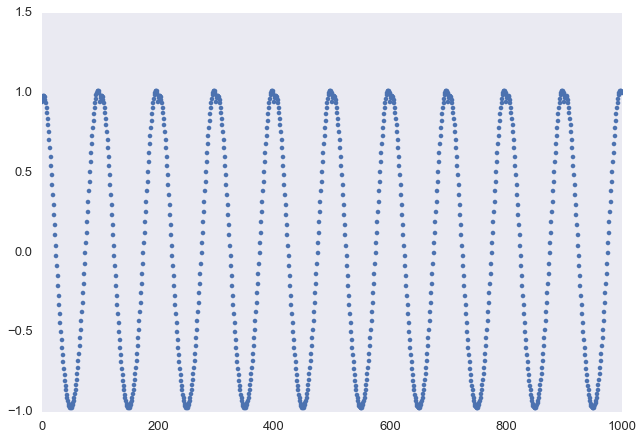

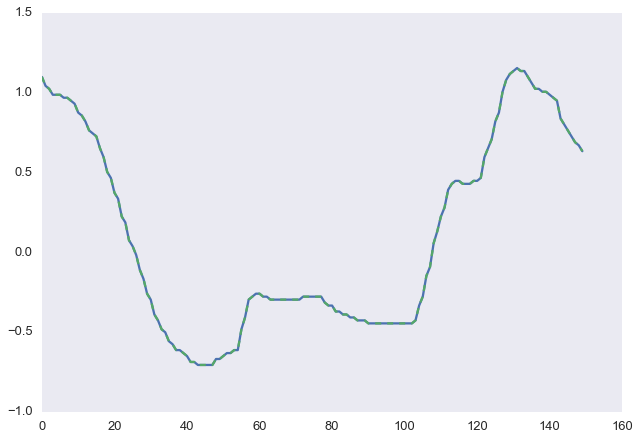

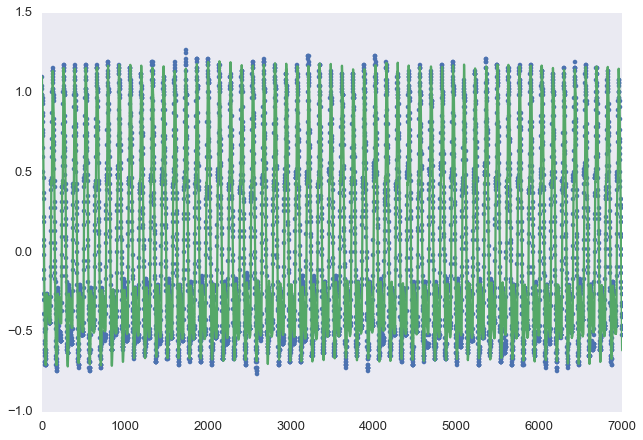

In [22]:

import sys
import time
import scipy.linalg as sl
import matplotlib.pyplot as plt
# import cvxpy
import numpy as np
import pickle
import FeatureVector_signal as fvs
import FeatureVector_local as fvl
# sys.path.append("C:\\Users\\Auris\\Box Sync\\Research\\Auris\\PyAuris\\Functions")
sys.path.append("../../Functions")
import LinearJacobianUpdate as lju 


with open( "heartbeat.p", "rb" ) as input_file:
    heart = pickle.load(input_file)
    heart_cath = heart[0]
    heart_stage = heart[1]
    delta_heart = heart[2]


# def featureVector(i):
#     fv = []
#     # fv.append(i%120)
#     # fv.append((i%120)**2)
#     # fv.append(i%130)
#     # fv.append((i%130)**2)
#     # fv.append(np.sin(i / 20))
#     # fv.append(np.sin(i / 10))
#     # fv.append(np.cos(i / 20))
#     # fv.append(np.cos(i / 10))
#     [fv.append(np.sin(i / (1*j))) for j in range(9, 20)]
#     [fv.append(np.cos(i / (1*j))) for j in range(9, 20)]
#     # [fv.append(np.sin(i / (.25*j))**2) for j in range(1, 80)]
#     # [fv.append(np.cos(i / (.25*j))**2) for j in range(1, 80)]
#     fv.append(1)
#     return fv

# heart_cath = heart_cath[:800]
# featureMatrix = np.asarray([featureVector(i) for i in range(len(heart_cath))])

# # print(featureMatrix.shape)
# AtA = np.dot(np.transpose(featureMatrix), featureMatrix)
# Atb = np.dot(np.transpose(featureMatrix), heart_cath[:,1])
# print(AtA.shape)
# print(Atb.shape)
# # wx = sl.pinv(featureMatrix, heart_cath[:,0])
# wx = sl.solve(AtA, Atb)
# print(sl.norm(np.dot(featureMatrix, wx) - heart_cath[:,1]))

# print(wx)
# plt.plot(np.dot(featureMatrix, wx), '.-')
# plt.plot(heart_cath[:,1],'--.')
# plt.show()


i = 100
raw = np.asarray([np.cos(j * (2 * np.pi/i)) for j in range(i)])
# plt.figure()
plt.plot(raw)
raw = np.reshape(raw, (i, 1))

featureMatrix = np.asarray([fvs.featureVector(j) for j in range(i)])
print(featureMatrix[:10,:], raw[:10])

# print(featureMatrix.shape)
AtA = np.dot(np.transpose(featureMatrix), featureMatrix)
Atb = np.dot(np.transpose(featureMatrix), raw)
print(AtA.shape)
print(Atb.shape)
# wx = sl.pinv(featureMatrix, heart_cath[:,0])
wx = sl.solve(AtA, Atb)
print(featureMatrix.shape, raw.shape)
w, res, rank, s = sl.lstsq(featureMatrix, raw)
print(w.shape)
print(res)
print(sl.norm(np.dot(featureMatrix, w) - raw))
# print('w', wx)
plt.plot(np.dot(featureMatrix, w), '--')

W = w.ravel()
# W = np.asarray([1.5,-.08, 8.06064343e-04,   6.94411678e-07, 1.00374759e-10,   4.99951781e-13])
# print(W)
# frac = 0.01
# for j in range(1000):
#     ix = j%i
#     fv = fvs.featureVector(ix)
#     # W = np.asarray([W])
#     print(W.shape, fv.shape, raw[ix].shape)
#     newW, change = lju.LinearJacobianUpdate_NoSafety(W, fv, raw[ix])
#     W = (1 - frac)*W + frac*newW.ravel()

# print(sl.norm(np.dot(featureMatrix, W.ravel()) - raw))
# plt.plot(np.dot(featureMatrix, W), '.')
# W = W.ravel()
# fv = fvs.featureVector(2)


# W = np.ones(len(fv))

fv = fvs.featureVector(2)
E = np.diag(W)
W = np.ones(len(fv))
frac = 0.0001
for j in range(1000):
    ix = j%i
    fv = np.dot(E, fvs.featureVector(ix))
    # print(raw[ix] - np.dot(W, fv))
    # print(raw[ix], np.dot(W,fv),  W, frac*(raw[ix] - np.dot(W, fv))*fv)
    W = W + frac*(raw[ix] - np.dot(W, fv))*fv
    # time.sleep(1)

# print(sl.norm(np.dot(featureMatrix, W.ravel()) - raw))
plt.figure()
featureMatrix = np.asarray([fvs.featureVector(j%100) for j in range(1000)])
plt.plot(np.dot(featureMatrix, np.dot(E,W)), '.')
 





### with heart beat
length = 150
# plt.figure()
raw = heart_cath[:length, 0]
plt.figure()
plt.plot(raw)
# raw = np.reshape(raw, (i, 1))

featureMatrix = np.asarray([fvl.featureVector(j) for j in range(length)])

w, res, rank, s = sl.lstsq(featureMatrix, raw)
# print(w.shape)
# print(res)
print('here', sl.norm(np.dot(featureMatrix, w) - raw))
print('w', w)
plt.plot(np.dot(featureMatrix, w), '--')

# W = w.ravel()

window = 2
new_beat = []
for j in range(window,len(heart_cath[:,0]) - window):
    frac  = .9
    prior = frac*heart_cath[j-1, 0] + (1-frac)*heart_cath[j-2, 0]
    post  = frac*heart_cath[j+1, 0] + (1-frac)*heart_cath[j+2, 0]
    if heart_cath[j, 0] > 1 and prior < heart_cath[j, 0] > post:
        new_beat.append(j)
print(new_beat)
W = w
length = 7000
frac = 0.25
ix = 0
estimate = []
EKG = new_beat[:]
for j in range(length):
    if j == EKG[0]:
        EKG.pop(0)
        ix = 0
    fv = np.asarray(fvl.featureVector(ix))
    # print(heart_cath[j, 0], heart_cath[ix,0], np.dot(W, fv))
    # print(raw[ix], np.dot(W,fv),  W, frac*(raw[ix] - np.dot(W, fv))*fv)
    estimate.append([j, np.dot(W, fv)])
    W = W + frac*(heart_cath[j, 0] - np.dot(W, fv))*fv
    # time.sleep(1)
    ix += 1


print(sl.norm(estimate[:,1] - heart_cath[:length,0]))


# print(W)



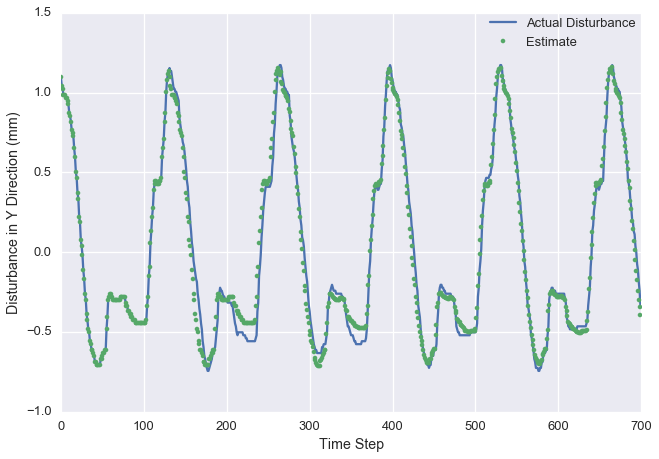

In [30]:
# print(sl.norm(np.dot(featureMatrix, W.ravel()) - raw))
length = 700
featureMatrix = np.asarray([fvl.featureVector(j%length) for j in range(length)])
plt.plot(heart_cath[:length, 0], '-', label = 'Actual Disturbance')
estimate = np.asarray(estimate)
plt.plot(estimate[:length,0], estimate[:length,1], '.', label = 'Estimate')
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Disturbance in Y Direction (mm)')
plt.legend(loc=0, borderaxespad=0)

